**Install Necessary Libraries**

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


**Read the Twitter Sentiment Dataset**

In [3]:
# Load Twitter sentiment dataset
twitter_data_path = r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\Twitter_Data.csv'
twitter_df = pd.read_csv(twitter_data_path)

# Display the first few rows
twitter_df.head()


clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

**Read the Play Store Dataset**

In [4]:
# Load Play Store sentiment datasets
apps_data_path = r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\apps.csv'
user_reviews_data_path = r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\user_reviews.csv'

apps_df = pd.read_csv(apps_data_path)
user_reviews_df = pd.read_csv(user_reviews_data_path)

# Display the first few rows
apps_df.head(), user_reviews_df.head()


(   Unnamed: 0                                                App  \
 0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
 1           1                                Coloring book moana   
 2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
 3           3                              Sketch - Draw & Paint   
 4           4              Pixel Draw - Number Art Coloring Book   
 
          Category  Rating  Reviews  Size     Installs  Type Price  \
 0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
 1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
 2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
 3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
 4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   
 
   Content Rating                     Genres      Last Updated  \
 0       Everyone               Art & Design   January 7, 2018   
 1       Everyone  Art & Desig

**Preprocess the Twitter Data**

In [6]:
# Preprocessing function
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''  # or return None, based on your preference
    # Convert to lower case
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply preprocessing
twitter_df['clean_text'] = twitter_df['clean_text'].apply(preprocess_text)


**Feature Extraction**

In [7]:
# Feature extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(twitter_df['clean_text'])
y = twitter_df['category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train a Machine Learning Model**


**Train a Support Vector Machine model:**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your DataFrame is named `twitter_df` and you have defined your features and target
# X = twitter_df['clean_text']  # or however you've defined your features
# y = twitter_df['target_column_name']  # Your target column

# Check for NaN values in y and drop corresponding rows in X
if y.isnull().any():
    # Print the number of NaN values in y
    print(f"Number of NaN values in target: {y.isnull().sum()}")

    # Drop rows with NaN values in y
    valid_indices = y.dropna().index
    X = X[valid_indices]
    y = y.dropna()  # Now y has no NaN values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text if not already done
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_svm))


Number of NaN values in target: 7


AttributeError: 'csr_matrix' object has no attribute 'lower'

**Data Visualization**

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already split your data and vectorized it
# X_train, X_test, y_train, y_test are defined and vectorized

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions using the Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


**Analyze Play Store User Reviews**

In [18]:
# Preprocess user reviews
user_reviews_df['Translated_Review'] = user_reviews_df['Translated_Review'].apply(preprocess_text)

# Visualizing sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=user_reviews_df, x='Sentiment',hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


**3D Scatter Plot of Twitter Sentiment**

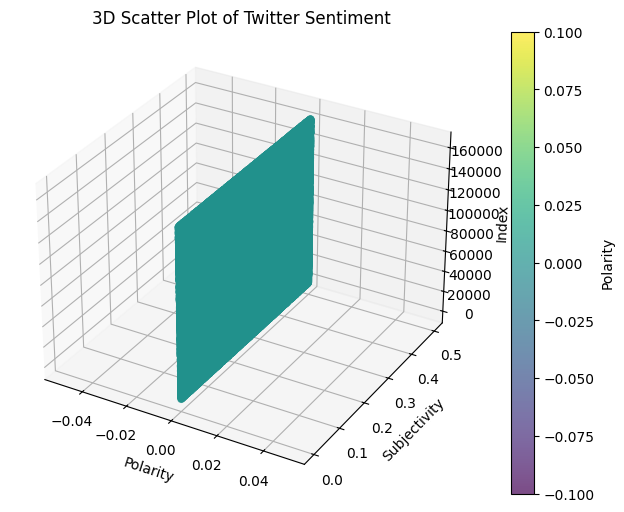

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Twitter dataset
twitter_data = pd.read_csv(r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\Twitter_Data.csv')

# Simulating Polarity and Subjectivity (if these columns are not in the dataset)
# You can replace this with actual sentiment analysis results if available
twitter_data['Polarity'] = (twitter_data['category'] == 'positive').astype(int) * 1 + (twitter_data['category'] == 'negative').astype(int) * -1
twitter_data['Subjectivity'] = (twitter_data['Polarity'] + np.random.uniform(0, 0.5, twitter_data.shape[0])).clip(0, 1)

# Prepare data for 3D scatter plot
x = twitter_data['Polarity']
y = twitter_data['Subjectivity']
z = np.arange(len(twitter_data))  # Using index as z-axis

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
scatter = ax.scatter(x, y, z, c=x, cmap='viridis', marker='o', alpha=0.7)

# Labels and Title
ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Index')
ax.set_title('3D Scatter Plot of Twitter Sentiment')

# Show color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Polarity')

# Show plot
plt.show()


**3D Surface Plot of App Ratings vs. Reviews**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load apps dataset
apps_data = pd.read_csv(r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\apps.csv')

# Clean and convert price to float properly (escape `$` properly)
apps_data['Price'] = apps_data['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Prepare data for surface plot
x = apps_data['Rating'].dropna().unique()  # Ensure we are using valid data, dropping NaN
y = apps_data['Reviews'].dropna().unique()  # Dropping NaN from reviews as well

# Create a meshgrid for the surface plot
X, Y = np.meshgrid(x, y)

# Initialize Z with NaN values (or zeros) to store the corresponding Price values
Z = np.full(X.shape, np.nan)

# Filling Z matrix based on corresponding Price
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        # Ensure we're accessing valid prices corresponding to Rating and Reviews
        price_value = apps_data.loc[
            (apps_data['Rating'] == X[i, j]) & (apps_data['Reviews'] == Y[i, j]), 'Price']
        Z[i, j] = price_value.values[0] if not price_value.empty else np.nan

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Price')
ax.set_title('3D Surface Plot of App Ratings vs. Reviews')

# Show color bar
fig.colorbar(surf)

# Show plot
plt.show()


<>:10: SyntaxWarning:

invalid escape sequence '\$'

<>:10: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\MATHAN\AppData\Local\Temp\ipykernel_3064\1635817643.py:10: SyntaxWarning:

invalid escape sequence '\$'



**3D Box Plot for User Review Sentiments**

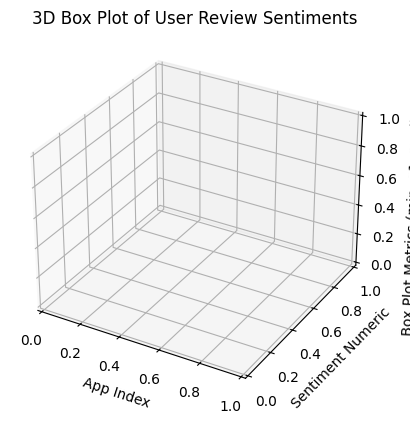

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load user reviews dataset
user_reviews_data = pd.read_csv(r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\user_reviews.csv')

# Prepare data for box plot
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
user_reviews_data['Sentiment_Numeric'] = user_reviews_data['Sentiment'].map(sentiment_mapping)

# Setup figure for 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get unique apps
unique_apps = user_reviews_data['App'].unique()

# Plot each app's box plot data along the z-axis
for idx, app in enumerate(unique_apps):
    app_data = user_reviews_data[user_reviews_data['App'] == app]['Sentiment_Numeric']
    
    # Compute basic statistics for box plot
    q1 = np.percentile(app_data, 25)
    q3 = np.percentile(app_data, 75)
    median = np.median(app_data)
    min_val = app_data.min()
    max_val = app_data.max()
    
    # Plot box in 3D
    ax.scatter([idx]*5, [min_val, q1, median, q3, max_val], [0, 1, 2, 3, 4], label=app)
    
# Set labels and title
ax.set_xlabel('App Index')
ax.set_ylabel('Sentiment Numeric')
ax.set_zlabel('Box Plot Metrics (min, q1, median, q3, max)')
ax.set_title('3D Box Plot of User Review Sentiments')

# Show the plot
plt.show()


**3D Histogram of Ratings**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load apps dataset
apps_data = pd.read_csv(r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\apps.csv')

# Clean the data: Remove rows with NaN values in 'Rating' or 'Reviews' columns
apps_data_clean = apps_data.dropna(subset=['Rating', 'Reviews'])

# Prepare data for 3D histogram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for histogram
hist, xedges, yedges = np.histogram2d(apps_data_clean['Rating'], apps_data_clean['Reviews'], bins=20)

# Prepare positions for the 3D bars
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

# Dimensions of the bars
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

# Plot the 3D histogram
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Ratings and Reviews')

# Show plot
plt.show()


**3D Line Plot of Ratings Over Time**

In [37]:
# Convert 'Last Updated' to datetime
apps_data['Last Updated'] = pd.to_datetime(apps_data['Last Updated'])
apps_data.sort_values('Last Updated', inplace=True)

# Prepare data for line plot
fig = go.Figure(data=[go.Scatter3d(x=apps_data['Last Updated'], y=apps_data['Rating'], z=apps_data['Installs'], mode='lines')])
fig.update_layout(title='3D Line Plot of Ratings Over Time')
fig.show()


**3D Bubble Chart of Apps by Category**

In [38]:
# Prepare bubble chart data
fig = go.Figure(data=[go.Scatter3d(x=apps_data['Category'], y=apps_data['Rating'], z=apps_data['Installs'],
                                     mode='markers', marker=dict(size=apps_data['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float) * 10))])
fig.update_layout(title='3D Bubble Chart of Apps by Category')
fig.show()


<>:3: SyntaxWarning:

invalid escape sequence '\$'

<>:3: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\MATHAN\AppData\Local\Temp\ipykernel_3064\1093229398.py:3: SyntaxWarning:

invalid escape sequence '\$'



**3D Heatmap of App Ratings and Reviews**

In [40]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load apps dataset
apps_data = pd.read_csv(r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\apps.csv')

# Clean the data: Remove rows with NaN values in 'Rating' or 'Reviews' columns
apps_data_clean = apps_data.dropna(subset=['Rating', 'Reviews'])

# Prepare data for heatmap
z, xedges, yedges = np.histogram2d(apps_data_clean['Rating'], apps_data_clean['Reviews'], bins=20)

# Generate the heatmap
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=xedges[:-1],  # Use xedges for x-axis
    y=yedges[:-1],  # Use yedges for y-axis
    colorscale='Viridis'
))

fig.update_layout(
    title='Heatmap of App Ratings and Reviews',
    xaxis_title='Rating',
    yaxis_title='Reviews'
)

fig.show()


**3D Contour Plot of User Review Sentiments**

In [42]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load user reviews dataset
user_reviews_data = pd.read_csv(r'C:\Users\MATHAN\Downloads\SENTIMENT ANALYSIS\user_reviews.csv')

# Clean the data: Remove rows with NaN values in 'Sentiment_Polarity' or 'Sentiment_Subjectivity'
user_reviews_clean = user_reviews_data.dropna(subset=['Sentiment_Polarity', 'Sentiment_Subjectivity'])

# Prepare data for contour plot
z, xedges, yedges = np.histogram2d(user_reviews_clean['Sentiment_Polarity'], user_reviews_clean['Sentiment_Subjectivity'], bins=20)

# Generate the contour plot
fig = go.Figure(data=go.Contour(
    z=z,
    x=xedges[:-1],  # Use xedges for x-axis
    y=yedges[:-1],  # Use yedges for y-axis
    colorscale='Viridis'
))

fig.update_layout(
    title='Contour Plot of User Review Sentiments',
    xaxis_title='Sentiment Polarity',
    yaxis_title='Sentiment Subjectivity'
)

fig.show()


**3D Violin Plot for App Categories**

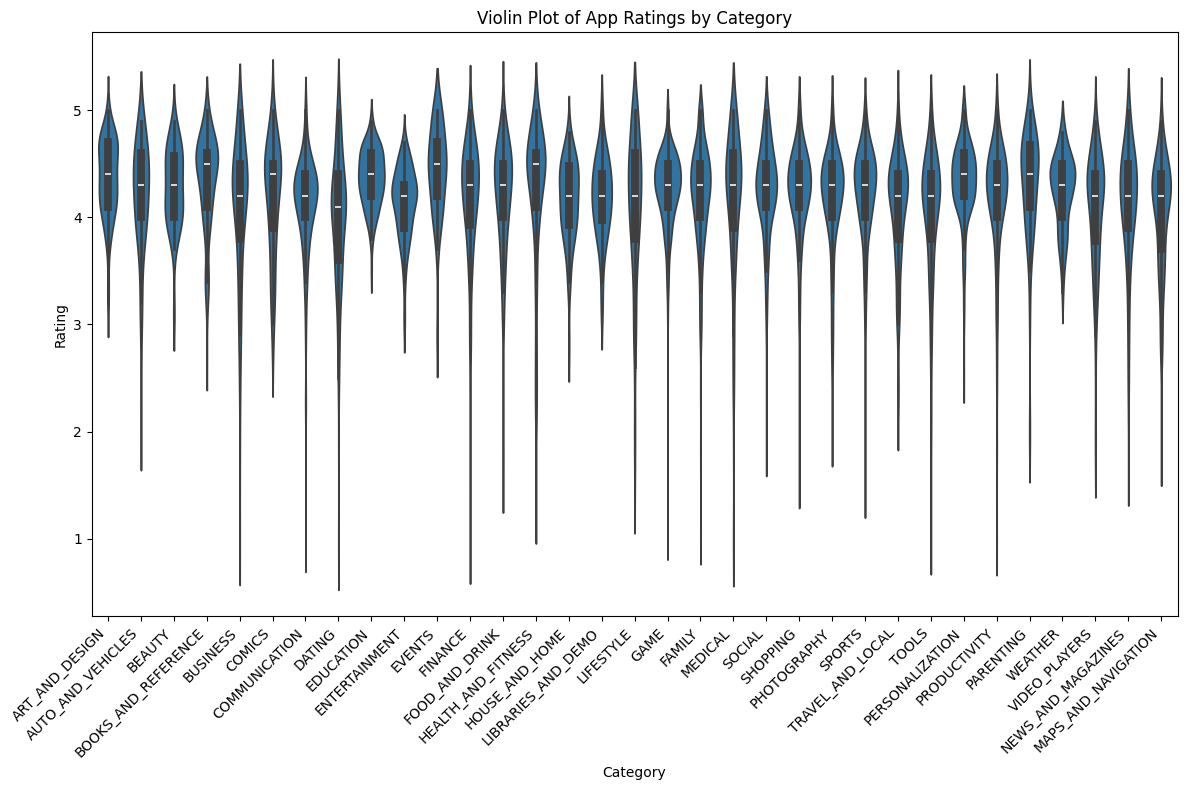

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up data for violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Category', y='Rating', data=apps_data)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set title and display plot
plt.title('Violin Plot of App Ratings by Category')
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()


**3D Clustered Scatter Plot of User Reviews**

In [45]:
from sklearn.datasets import make_blobs

# Create sample clustered data
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# 3D Clustered Scatter Plot
fig = go.Figure(data=[go.Scatter3d(x=X[:, 0], y=X[:, 1], z=user_reviews_data['Sentiment_Polarity'].values, mode='markers', marker=dict(color=y, colorscale='Viridis'))])
fig.update_layout(title='3D Clustered Scatter Plot of User Reviews')
fig.show()


**Strip Plot**

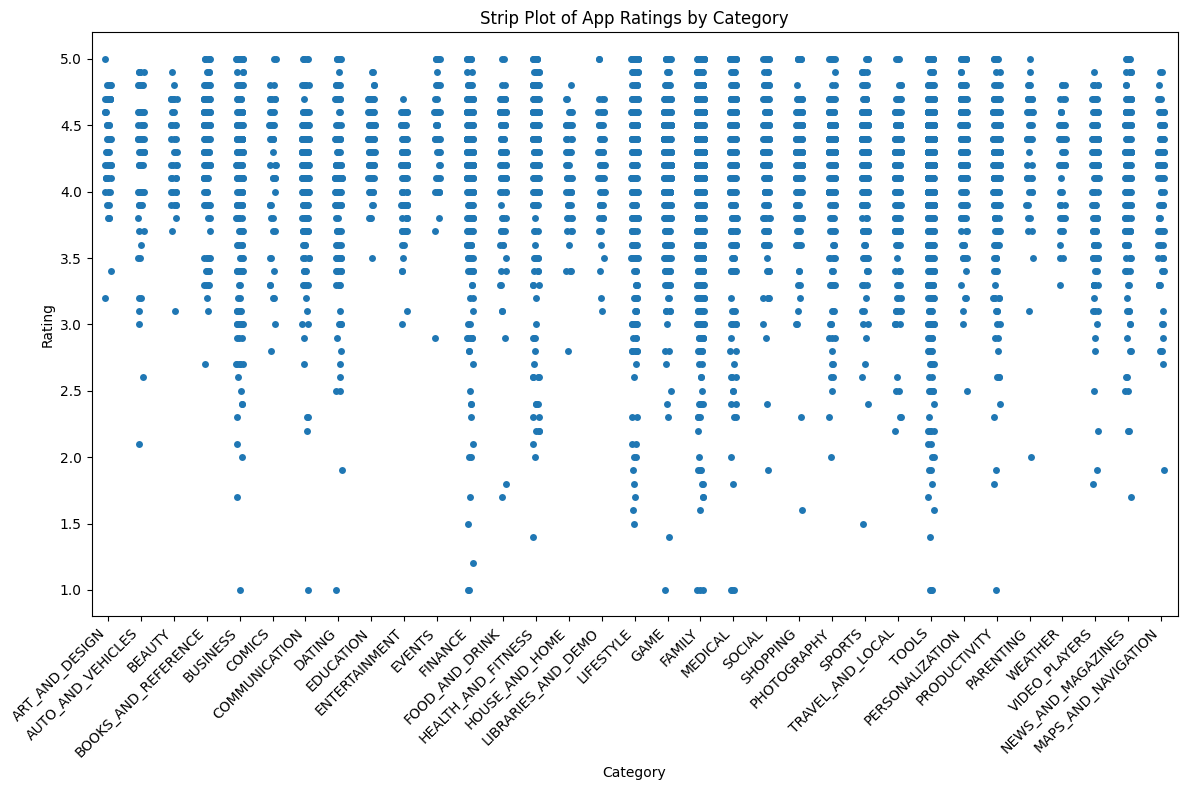

In [48]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='Category', y='Rating', data=apps_data, jitter=True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Strip Plot of App Ratings by Category')
plt.tight_layout()
plt.show()


**Box Plot with Jitter (Strip Plot)**

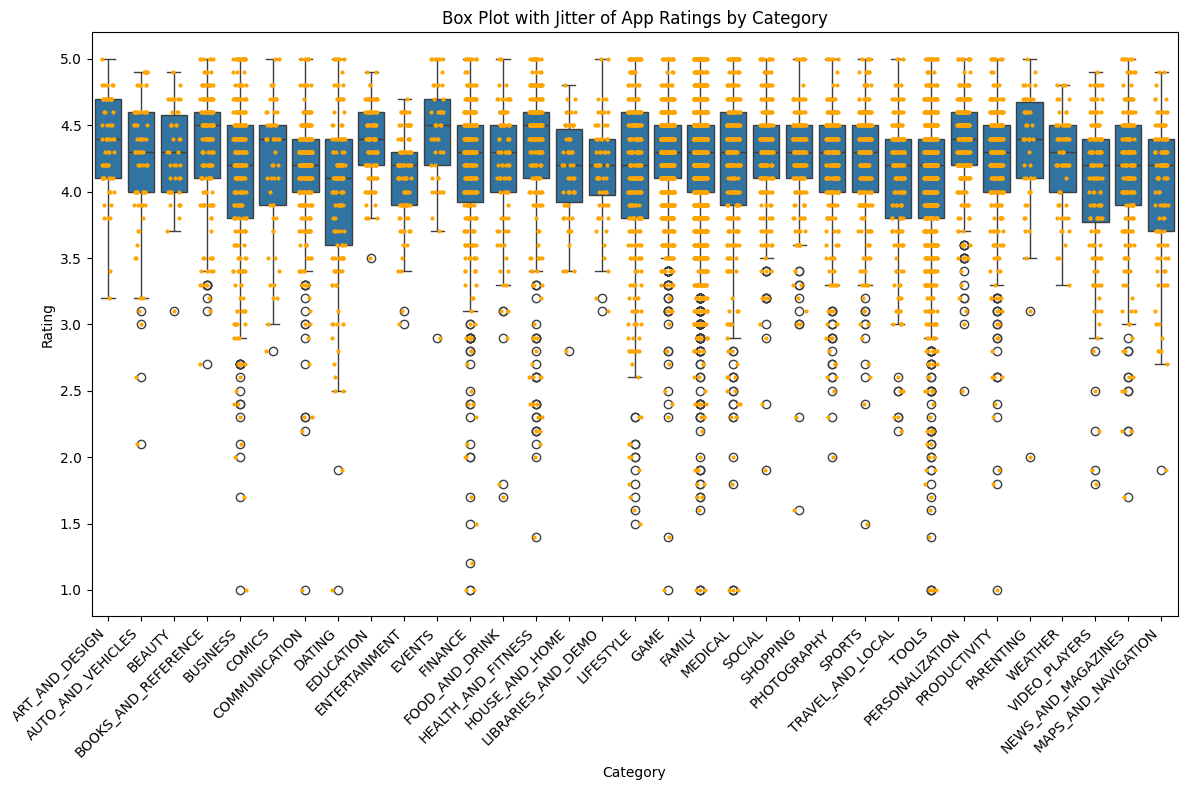

In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=apps_data)
sns.stripplot(x='Category', y='Rating', data=apps_data, color='orange', jitter=0.2, size=3)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Box Plot with Jitter of App Ratings by Category')
plt.tight_layout()
plt.show()


**Facet Grid (Multiple Subplots)**

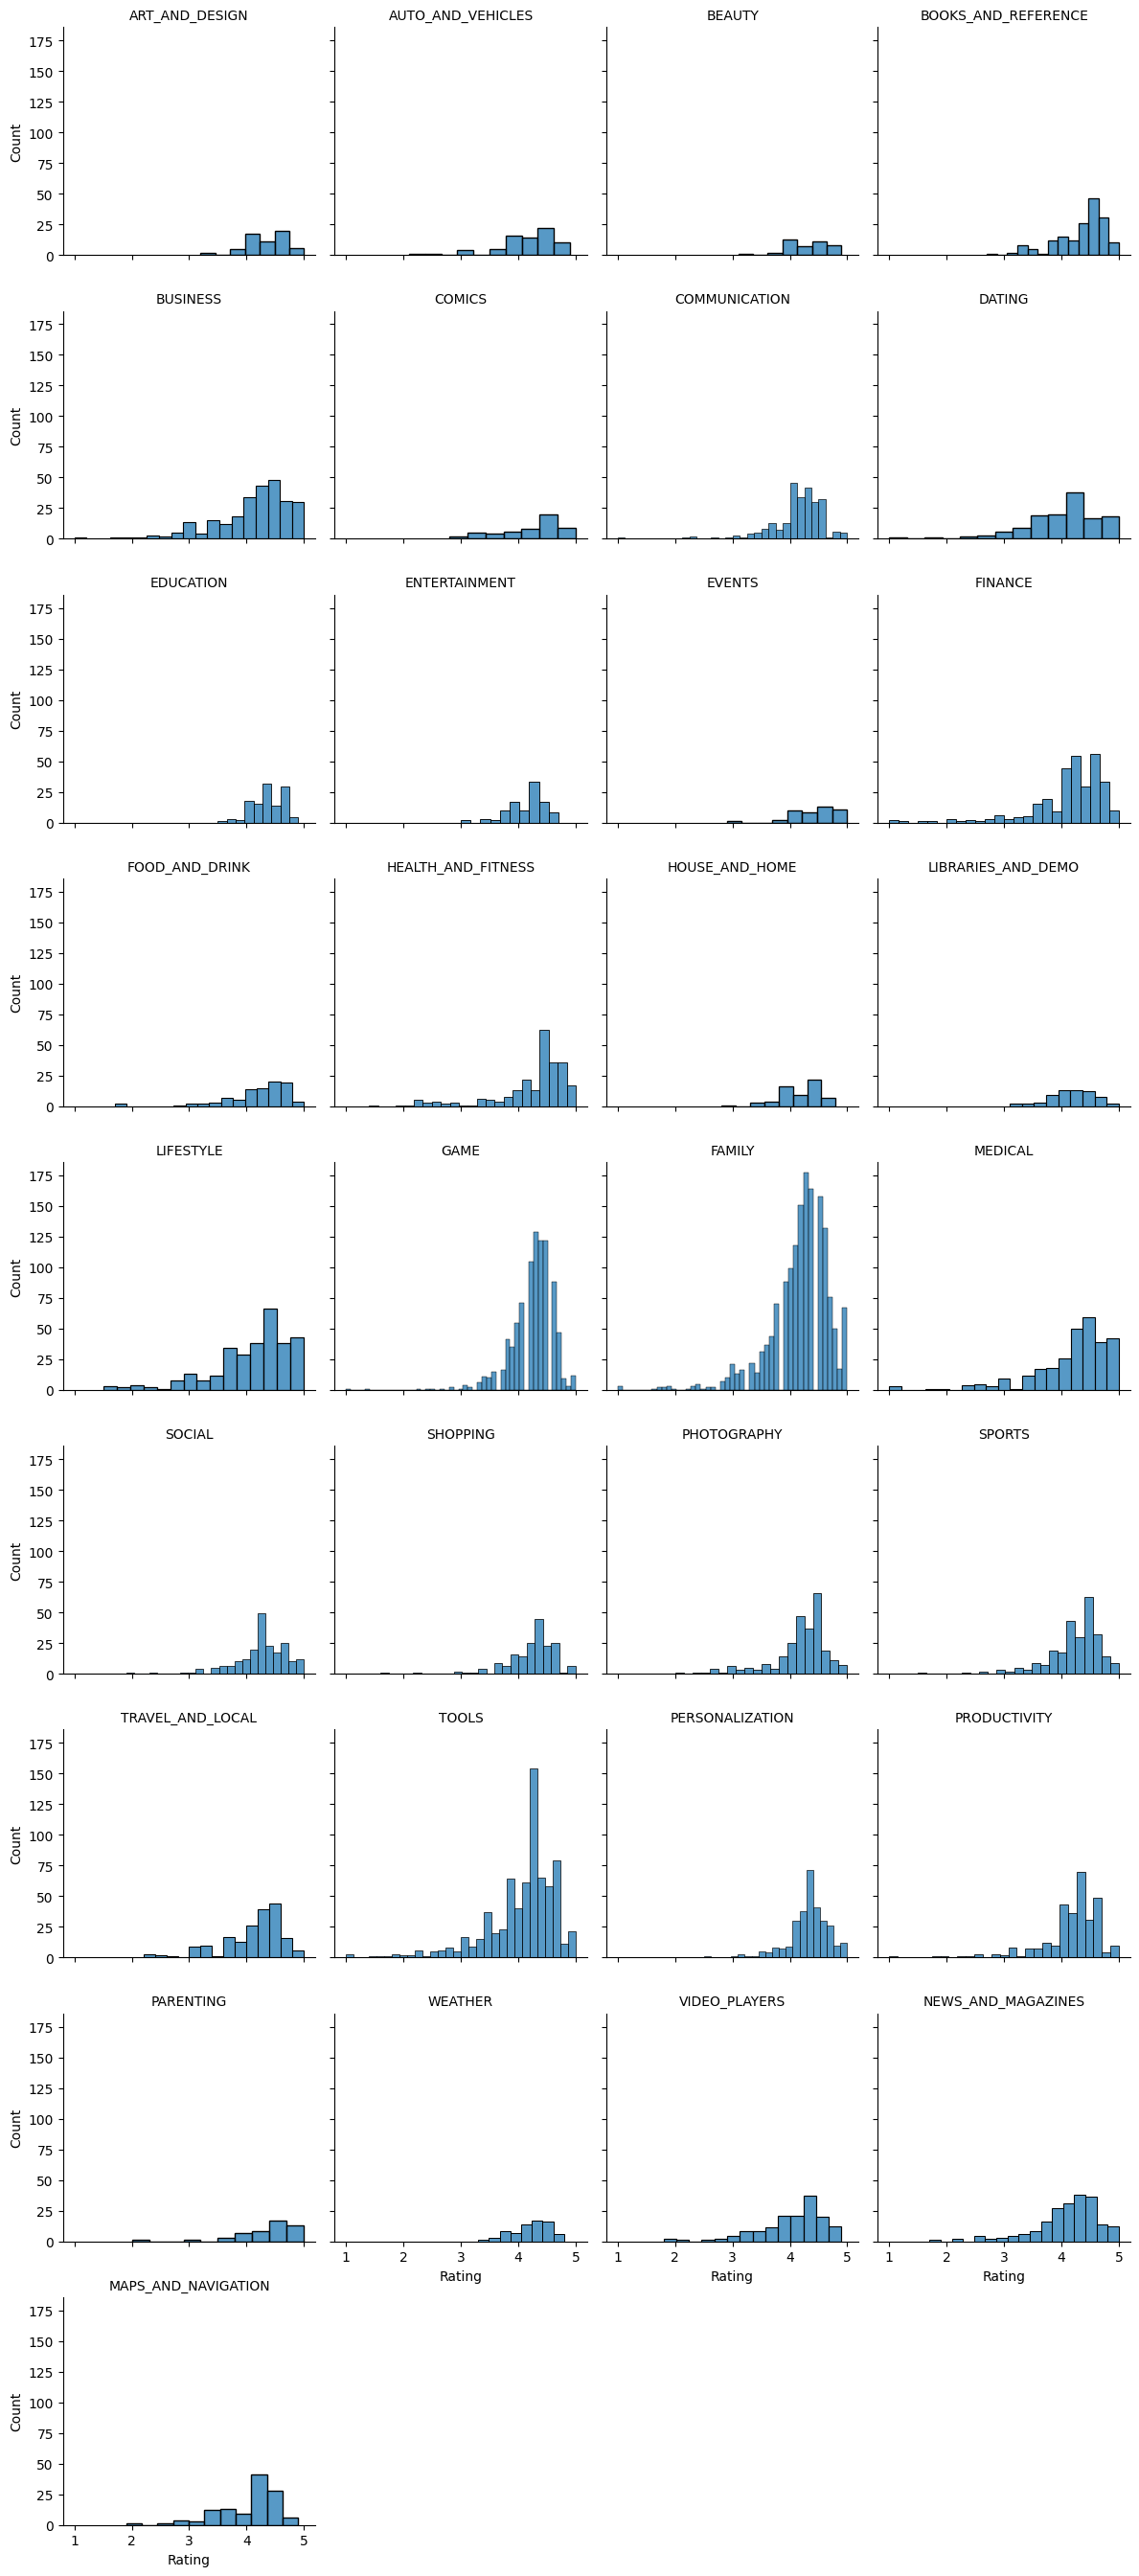

In [50]:
g = sns.FacetGrid(apps_data, col="Category", col_wrap=4, height=3)
g.map(sns.histplot, 'Rating')
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()


**Pair Plot (For Numerical Variables)**

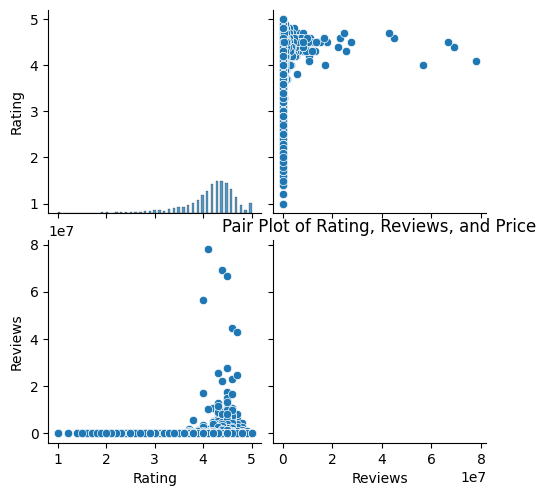

In [51]:
sns.pairplot(apps_data[['Rating', 'Reviews', 'Price']])
plt.title('Pair Plot of Rating, Reviews, and Price')
plt.show()


**Correlation Heatmap**

<>:2: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\MATHAN\AppData\Local\Temp\ipykernel_3064\2212856002.py:2: SyntaxWarning:

invalid escape sequence '\$'



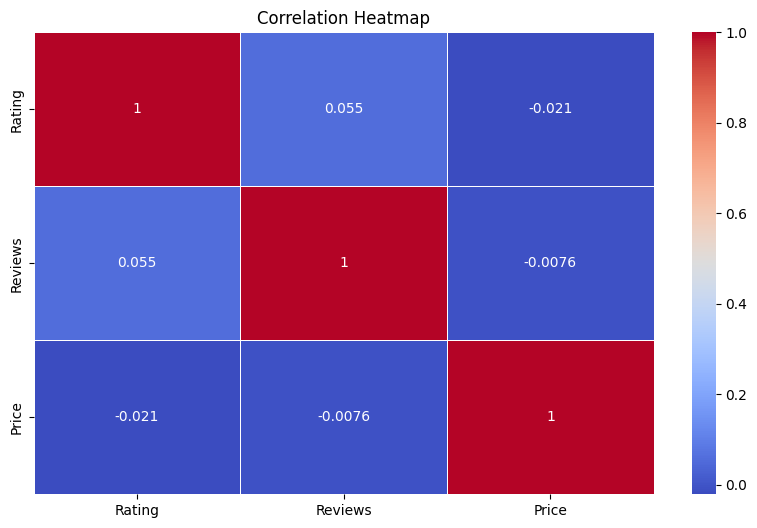

In [53]:
# Remove the dollar sign and convert the Price column to float
apps_data['Price'] = apps_data['Price'].replace({'\$': ''}, regex=True).astype(float)

# Now, create the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = apps_data[['Rating', 'Reviews', 'Price']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Count Plot**

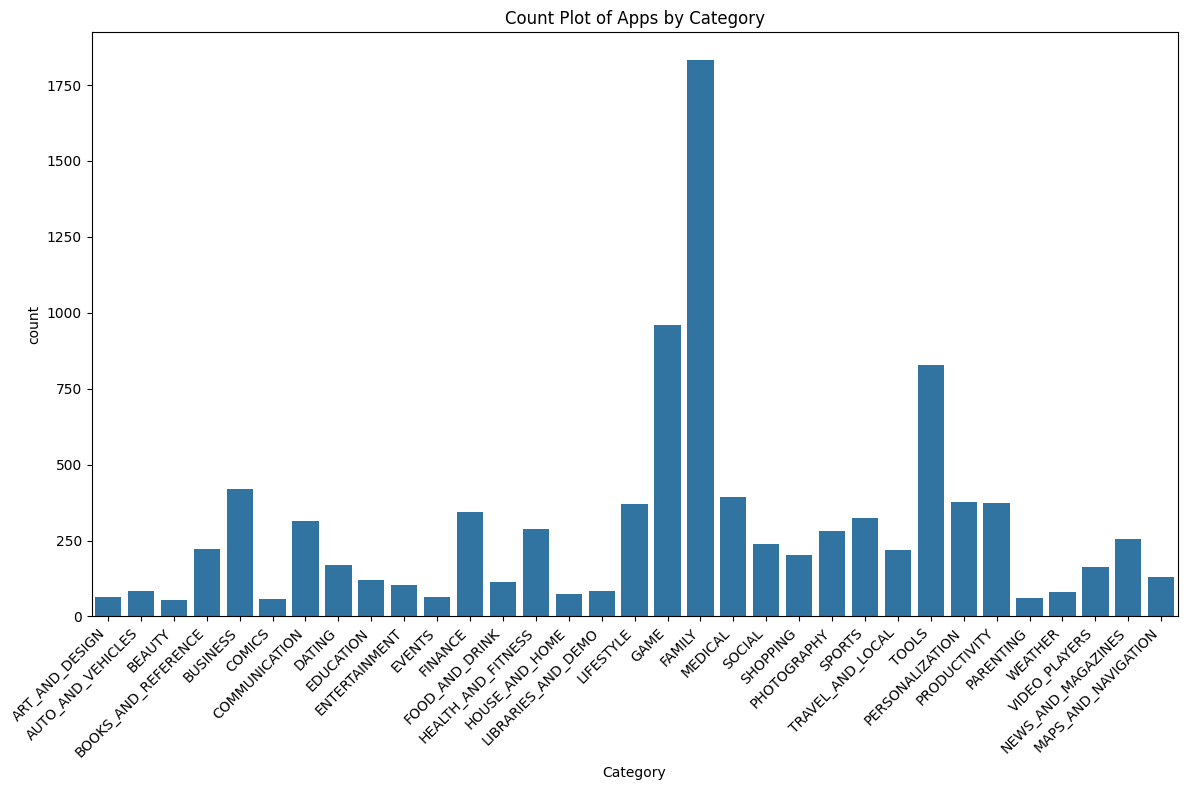

In [54]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Category', data=apps_data)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Count Plot of Apps by Category')
plt.tight_layout()
plt.show()


**Joint Plot**

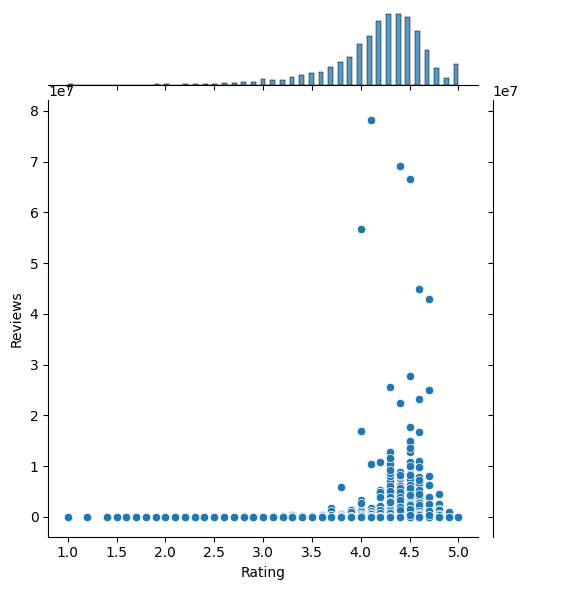

In [55]:
sns.jointplot(x='Rating', y='Reviews', data=apps_data, kind='scatter')
plt.show()
